In [1]:
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import numpy as np
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER

In [2]:
from db_routes import load_routes_from_db
from lib.walks import  Route

In [3]:
def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(12, 17), subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

In [4]:
def bounds(rts):
    return (
        min(rt.bounds[0] for rt in rts.values()),
        min(rt.bounds[1] for rt in rts.values()),
        max(rt.bounds[2] for rt in rts.values()),
        max(rt.bounds[3] for rt in rts.values()),
    )

## Route Collections ("Projects")

| Desc | IDs |
| --- | ---- |
| Colouring Sidcup/Bexley | 0-35, 48, 51, 56, 114, 149-150, 155 |
| One-way to Costa | 36-47, 49-50, 52-55, 57-89, 91, 94-99, 139-148, 151-154, 156 |
| Green Chain | 90, 92-93  |
| The City | 100-113, 115-125, 127, 129, 131, 136-138 |
| Regents Canal | 126, 128, 130, 132-135 |
| Capital Ring | 157-163 |

In [5]:
def random_color():
    return (
        0.5 * np.random.random_sample() + 0.25,
        0.5 * np.random.random_sample() + 0.25,
        0.5 * np.random.random_sample() + 0.25,
    )

def plot_routes(routes: dict[int, Route]):
    image_factory = cimgt.OSM()  # Open Street Map

    pad_lat = 0.002
    pad_lon = 0.002

    lon_min, lat_min, lon_max, lat_max = bounds(routes)
    extent = [lon_min - pad_lon, lon_max + pad_lon, lat_min - pad_lat, lat_max + pad_lat]

    fig, ax = make_map(projection=image_factory.crs)
    ax.set_extent(extent)

    # the second argument in that add_image() call is passed to the image_factory and is the "target_z".
    # see https://github.com/SciTools/cartopy/blob/master/lib/cartopy/io/img_tiles.py
    # OSM() inherits from GoogleWTS, which holds the image_for_domain() method, which is where
    # the 14 gets used.
    # target_z seems to be more "zoom" than (what I thought at first) "z-order"
    # 1-3, 5: no map
    # 4: some kind of blocks, quite large
    # 6: smaller blocks, noobvious pattern
    # 7: similar to 6, some green appearing
    # 12 seems to include a lot of place names, 13 has the names much smaller, while 14 makes then tiny
    img = ax.add_image(image_factory, 16)

    for route in routes.values():
        s = ax.add_geometries(
            route.shape,
            ccrs.PlateCarree(),
            facecolor="none",
            edgecolor="blue",  # (random_color()),
            linewidth=1,
        )

157 2025-01-17 1610
158 2025-01-25 1800
159 2025-01-25 976
160 2025-02-07 4088
161 2025-02-21 1751
162 2025-03-11 1984
163 2025-04-25 3320


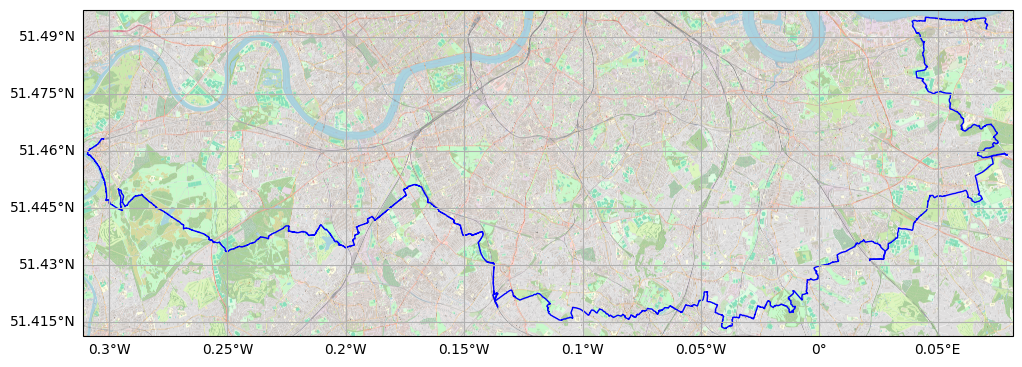

In [40]:
routes = load_routes_from_db(157)
for i, r in routes.items():
    print(i, r.walk_date, len(r.points))
plot_routes(routes)